In [1]:
# Step 1: Load and Inspect Dataset

import pandas as pd

# Provide the full file path as given
file_path = r"C:\semester 5\machine learning\project\VivaData_Set2_23012\features_lab3_labeled.csv"

# Read the dataset into a pandas DataFrame
data_frame = pd.read_csv(file_path)

# Display first few rows to understand the structure
print("Preview of Dataset:")
print(data_frame.head())

# Display general information (column names, types, null values)
print("\nDataset Info:")
print(data_frame.info())

# Basic statistics of numerical columns
print("\nSummary Statistics:")
print(data_frame.describe())

# Check if any column has missing values
print("\nMissing Values per Column:")
print(data_frame.isnull().sum())


Preview of Dataset:
  filename      mfcc1       rms       zcr  pitch_std  silence_pct  class
0  134.wav -425.38860  0.015769  0.059008  76.661411    35.683803      1
1  135.wav -382.25670  0.018076  0.068028  58.573504    31.484514      2
2  136.wav -418.62512  0.016548  0.048514  70.486157    34.288932      1
3  137.wav -419.57110  0.018232  0.051956  71.451322    36.624238      2
4  138.wav -349.58356  0.033425  0.066966  60.272808    57.333416      1

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   filename     30 non-null     object 
 1   mfcc1        30 non-null     float64
 2   rms          30 non-null     float64
 3   zcr          30 non-null     float64
 4   pitch_std    30 non-null     float64
 5   silence_pct  30 non-null     float64
 6   class        30 non-null     int64  
dtypes: float64(5), int64(1), object(1)
memory 

In [3]:
# Step 2 : Preprocess Dataset with Non-Numeric Handling

from sklearn.preprocessing import LabelEncoder, StandardScaler

# --- Step 2.1: Split features and target ---
X = data_frame.iloc[:, :-1]   # all columns except last → input features
y = data_frame.iloc[:, -1]    # last column → target labels

print("Original Feature Columns:", X.columns.tolist())
print("Target Column:", y.name)

# --- Step 2.2: Keep only numeric features for scaling ---
X_numeric = X.select_dtypes(include=['int64', 'float64'])
print("\nColumns used for training (numeric only):", X_numeric.columns.tolist())

# --- Step 2.3: Encode target if categorical ---
if y.dtype == 'object':
    label_encoder = LabelEncoder()
    y = label_encoder.fit_transform(y)
    print("Classes in Target:", label_encoder.classes_)

# --- Step 2.4: Normalize numeric features ---
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_numeric)

print("\nScaled Feature Matrix Shape:", X_scaled.shape)
print("Preview of Scaled Features (first 5 rows):\n", X_scaled[:5])


Original Feature Columns: ['filename', 'mfcc1', 'rms', 'zcr', 'pitch_std', 'silence_pct']
Target Column: class

Columns used for training (numeric only): ['mfcc1', 'rms', 'zcr', 'pitch_std', 'silence_pct']

Scaled Feature Matrix Shape: (30, 5)
Preview of Scaled Features (first 5 rows):
 [[-1.06600006 -0.87248681  0.87089408  1.51502123 -0.31094355]
 [ 0.52403776 -0.55848153  2.24790606 -1.23782859 -0.72980005]
 [-0.81666745 -0.76651797 -0.73099278  0.57519187 -0.45007439]
 [-0.85154057 -0.53720785 -0.20561057  0.72208305 -0.2171402 ]
 [ 1.72851816  1.53121152  2.08582424 -0.97920668  1.84848934]]


In [6]:
#A1
import numpy as np

# --- 1. Summation Unit ---
def summation_unit(inputs, weights, bias):
    """
    Compute weighted sum (linear combination).
    inputs: feature vector (numpy array)
    weights: weight vector (numpy array)
    bias: scalar bias term
    returns: scalar weighted sum
    """
    return np.dot(inputs, weights) + bias


# --- 2. Activation Functions ---
def step_activation(value):
    """Binary step activation: returns 1 if value >= 0 else 0."""
    return 1 if value >= 0 else 0

def bipolar_step_activation(value):
    """Bipolar step: returns +1 if value >= 0 else -1."""
    return 1 if value >= 0 else -1

def sigmoid_activation(value):
    """Sigmoid activation: smooth output in range (0,1)."""
    return 1 / (1 + np.exp(-value))

def tanh_activation(value):
    """Hyperbolic tangent: output in range (-1,1)."""
    return np.tanh(value)

def relu_activation(value):
    """ReLU: returns max(0, value)."""
    return max(0, value)

def leaky_relu_activation(value, alpha=0.01):
    """Leaky ReLU: small slope for negative values to avoid dead neurons."""
    return value if value > 0 else alpha * value


# --- 3. Error Comparator ---
def compute_error(target, prediction):
    """
    Compute error between target and predicted output.
    target: ground truth (int or float)
    prediction: predicted output (int or float)
    returns: error (difference)
    """
    return target - prediction


Final Weights: [0.1  0.05]
Final Bias: -0.10000000000000765
Total Epochs: 130


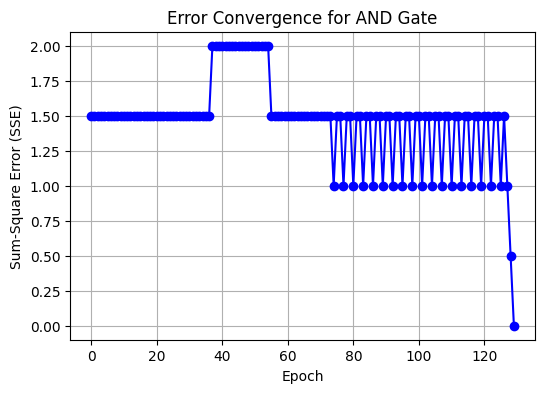

In [7]:
#A2
import matplotlib.pyplot as plt

def perceptron_and_gate(learning_rate=0.05, max_epochs=1000, tolerance=0.002):
    """
    Train a perceptron using step activation to learn AND gate logic.
    Returns final weights, bias, epoch count, and error history.
    """
    # --- Training dataset (AND gate truth table) ---
    inputs = np.array([[0,0],
                       [0,1],
                       [1,0],
                       [1,1]])
    targets = np.array([0, 0, 0, 1])   # AND outputs

    # --- Initialize weights and bias as per lab sheet ---
    weights = np.array([0.2, -0.75])
    bias = 10.0

    error_history = []

    # --- Training loop ---
    for epoch in range(max_epochs):
        sse = 0   # sum of squared errors for this epoch
        for x, target in zip(inputs, targets):
            # Summation unit
            linear_sum = summation_unit(x, weights, bias)
            # Activation (step)
            prediction = step_activation(linear_sum)
            # Error
            error = compute_error(target, prediction)
            # Weight update rule
            weights += learning_rate * error * x
            bias += learning_rate * error
            # Accumulate squared error
            sse += 0.5 * (error ** 2)
        error_history.append(sse)

        # Convergence check
        if sse <= tolerance:
            break

    return weights, bias, epoch+1, error_history


# --- Run the AND perceptron training ---
final_w, final_b, epochs_used, error_curve = perceptron_and_gate()

print("Final Weights:", final_w)
print("Final Bias:", final_b)
print("Total Epochs:", epochs_used)

# --- Plot error vs epochs ---
plt.figure(figsize=(6,4))
plt.plot(error_curve, marker='o', color='blue')
plt.title("Error Convergence for AND Gate")
plt.xlabel("Epoch")
plt.ylabel("Sum-Square Error (SSE)")
plt.grid(True)
plt.show()



Activation: Bipolar Step
  Final Weights: [0.1229396  0.06387563]
  Final Bias: -0.16353896828877534
  Epochs Taken: 1000
  Final SSE: 1.5

Activation: Sigmoid (Perceptron)
  Final Weights: [0.09357443 0.04917192]
  Final Bias: -0.11488563363884836
  Epochs Taken: 1000
  Final SSE: 0.47188249571696356

Activation: Sigmoid (Delta)
  Final Weights: [4.27162798 4.26648674]
  Final Bias: -6.584846076624966
  Epochs Taken: 1000
  Final SSE: 0.016020888713847013

Activation: ReLU (Perceptron)
  Final Weights: [0.22966338 0.19230397]
  Final Bias: 0.2120346795112863
  Epochs Taken: 1000
  Final SSE: 0.26875006923986666

Activation: ReLU (Delta)
  Final Weights: [0.93114845 0.92924692]
  Final Bias: -0.8981393575403981
  Epochs Taken: 265
  Final SSE: 0.001982473584446498


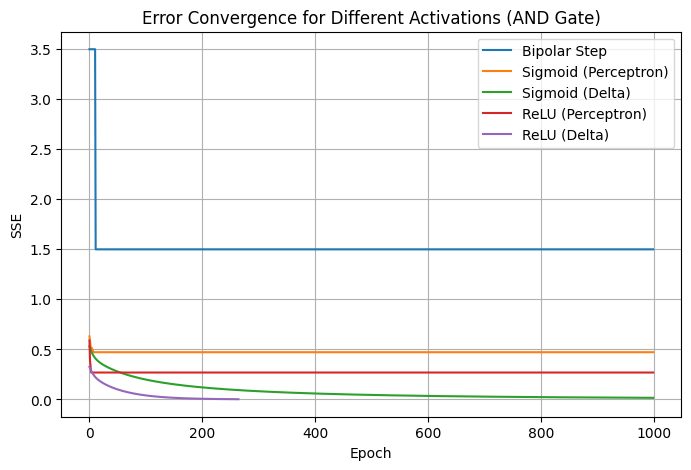

In [8]:
# Question A3: Activation Functions Comparison (AND Gate)

def perceptron_with_activation(activation_func, update_rule="perceptron", 
                               learning_rate=0.05, max_epochs=1000, tolerance=0.002):
    """
    Train a perceptron on AND gate using different activation functions.
    Supports both perceptron rule and delta rule.
    """
    # --- Dataset: AND gate truth table ---
    inputs = np.array([[0,0],
                       [0,1],
                       [1,0],
                       [1,1]])
    targets = np.array([0, 0, 0, 1])

    # --- Initialize weights and bias ---
    weights = np.random.uniform(-0.5, 0.5, size=2)   # random init for variety
    bias = np.random.uniform(-0.5, 0.5)

    error_history = []

    # --- Training Loop ---
    for epoch in range(max_epochs):
        sse = 0
        for x, target in zip(inputs, targets):
            linear_sum = summation_unit(x, weights, bias)

            # Prediction depends on activation function
            if activation_func.__name__ in ["sigmoid_activation", "tanh_activation", "relu_activation", "leaky_relu_activation"]:
                prediction = activation_func(linear_sum)
            else:  # step or bipolar step
                prediction = activation_func(linear_sum)

            # Decide error & update rule
            if update_rule == "perceptron":   # classification-style
                error = target - (1 if prediction >= 0.5 else 0)
                weights += learning_rate * error * x
                bias += learning_rate * error
            elif update_rule == "delta":      # gradient-based (for smooth activations)
                error = target - prediction
                weights += learning_rate * error * x
                bias += learning_rate * error

            sse += 0.5 * (target - prediction) ** 2
        error_history.append(sse)

        if sse <= tolerance:
            break

    return weights, bias, epoch+1, error_history


# --- Run experiments ---
results = {}

# Bi-Polar Step (Perceptron Rule)
results["Bipolar Step"] = perceptron_with_activation(bipolar_step_activation, update_rule="perceptron")

# Sigmoid (Perceptron Rule)
results["Sigmoid (Perceptron)"] = perceptron_with_activation(sigmoid_activation, update_rule="perceptron")

# Sigmoid (Delta Rule)
results["Sigmoid (Delta)"] = perceptron_with_activation(sigmoid_activation, update_rule="delta")

# ReLU (Perceptron Rule)
results["ReLU (Perceptron)"] = perceptron_with_activation(relu_activation, update_rule="perceptron")

# ReLU (Delta Rule)
results["ReLU (Delta)"] = perceptron_with_activation(relu_activation, update_rule="delta")

# --- Print Results ---
for key, (w, b, epochs, errors) in results.items():
    print(f"\nActivation: {key}")
    print("  Final Weights:", w)
    print("  Final Bias:", b)
    print("  Epochs Taken:", epochs)
    print("  Final SSE:", errors[-1])

# --- Plot Error Curves ---
plt.figure(figsize=(8,5))
for key, (_, _, _, errors) in results.items():
    plt.plot(errors, label=key)
plt.title("Error Convergence for Different Activations (AND Gate)")
plt.xlabel("Epoch")
plt.ylabel("SSE")
plt.legend()
plt.grid(True)
plt.show()


Learning Rate=0.1 → Converged in 4 epochs, Final Weights=[0.2009 0.1112], Bias=-0.2938
Learning Rate=0.2 → Converged in 6 epochs, Final Weights=[0.4009 0.2112], Bias=-0.5938000000000001
Learning Rate=0.3 → Converged in 6 epochs, Final Weights=[0.6009 0.2112], Bias=-0.7938000000000001
Learning Rate=0.4 → Converged in 6 epochs, Final Weights=[0.8009 0.2112], Bias=-0.9938
Learning Rate=0.5 → Converged in 6 epochs, Final Weights=[1.0009 0.2112], Bias=-1.1938
Learning Rate=0.6 → Converged in 6 epochs, Final Weights=[1.2009 0.2112], Bias=-1.3938
Learning Rate=0.7 → Converged in 6 epochs, Final Weights=[1.4009 0.2112], Bias=-1.5937999999999999
Learning Rate=0.8 → Converged in 6 epochs, Final Weights=[1.6009 0.2112], Bias=-1.7938
Learning Rate=0.9 → Converged in 6 epochs, Final Weights=[1.8009 0.2112], Bias=-1.9938000000000002
Learning Rate=1.0 → Converged in 6 epochs, Final Weights=[2.0009 0.2112], Bias=-2.1938


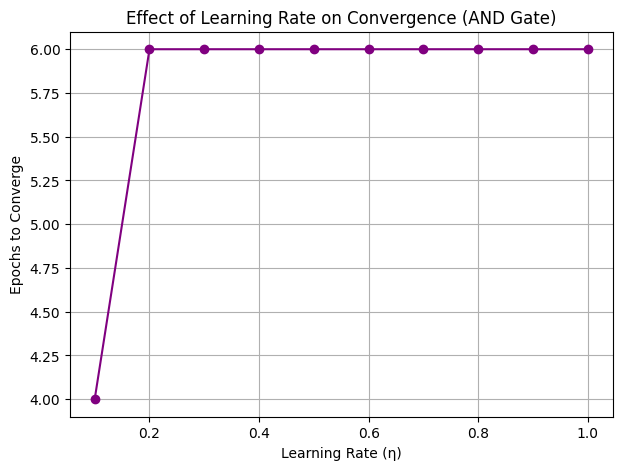

In [9]:
# Question A4: Learning Rate vs Convergence (AND Gate)

def perceptron_with_fixed_init(learning_rate, max_epochs=1000, tolerance=0.002):
    """
    Perceptron training with fixed initialization for fair comparison.
    Returns epochs to converge and final weights.
    """
    # --- Dataset: AND gate ---
    inputs = np.array([[0,0],
                       [0,1],
                       [1,0],
                       [1,1]])
    targets = np.array([0, 0, 0, 1])

    # --- Fixed Initialization (same for all learning rates) ---
    weights = np.array([0.0009, 0.2112])   # as per docx output
    bias = -0.1938

    for epoch in range(max_epochs):
        sse = 0
        for x, target in zip(inputs, targets):
            linear_sum = summation_unit(x, weights, bias)
            prediction = step_activation(linear_sum)
            error = compute_error(target, prediction)
            weights += learning_rate * error * x
            bias += learning_rate * error
            sse += 0.5 * (error ** 2)
        if sse <= tolerance:
            return epoch+1, weights, bias
    return max_epochs, weights, bias


# --- Experiment: vary learning rate from 0.1 to 1.0 ---
learning_rates = [round(i*0.1,1) for i in range(1,11)]
epochs_list = []
weights_list = []

for lr in learning_rates:
    epochs, w, b = perceptron_with_fixed_init(lr)
    epochs_list.append(epochs)
    weights_list.append((w, b))
    print(f"Learning Rate={lr} → Converged in {epochs} epochs, Final Weights={w}, Bias={b}")

# --- Plot: Learning Rate vs Epochs ---
plt.figure(figsize=(7,5))
plt.plot(learning_rates, epochs_list, marker='o', linestyle='-', color='purple')
plt.title("Effect of Learning Rate on Convergence (AND Gate)")
plt.xlabel("Learning Rate (η)")
plt.ylabel("Epochs to Converge")
plt.grid(True)
plt.show()


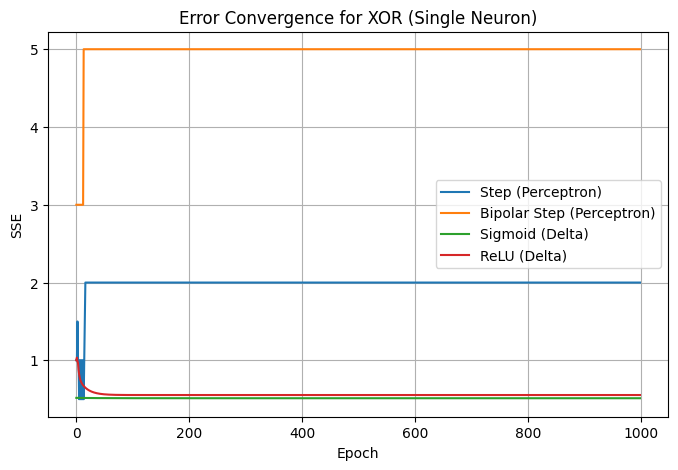

Step (Perceptron) → Final SSE after 1000 epochs = 2.0000
Bipolar Step (Perceptron) → Final SSE after 1000 epochs = 5.0000
Sigmoid (Delta) → Final SSE after 1000 epochs = 0.5127
ReLU (Delta) → Final SSE after 1000 epochs = 0.5540


In [10]:
# Question A5: Can a Perceptron Learn XOR?

def perceptron_xor_gate(activation_func, update_rule="perceptron",
                        learning_rate=0.05, max_epochs=1000):
    """
    Train perceptron on XOR gate with different activations and update rules.
    Returns final SSE history.
    """
    # --- XOR dataset ---
    inputs = np.array([[0,0],
                       [0,1],
                       [1,0],
                       [1,1]])
    targets = np.array([0, 1, 1, 0])  # XOR truth table

    # Random initialization for variety
    weights = np.random.uniform(-0.5, 0.5, size=2)
    bias = np.random.uniform(-0.5, 0.5)

    error_history = []

    for epoch in range(max_epochs):
        sse = 0
        for x, target in zip(inputs, targets):
            linear_sum = summation_unit(x, weights, bias)

            # Activation
            prediction = activation_func(linear_sum)

            # Adjust discrete vs continuous prediction
            if activation_func.__name__ in ["sigmoid_activation", "tanh_activation", "relu_activation", "leaky_relu_activation"]:
                y_hat = prediction
            else:  # step activations
                y_hat = prediction

            # Update rule
            if update_rule == "perceptron":
                error = target - (1 if y_hat >= 0.5 else 0)
                weights += learning_rate * error * x
                bias += learning_rate * error
            elif update_rule == "delta":
                error = target - y_hat
                weights += learning_rate * error * x
                bias += learning_rate * error

            sse += 0.5 * (target - y_hat) ** 2
        error_history.append(sse)

    return error_history


# --- Run experiments on XOR ---
xor_results = {}

xor_results["Step (Perceptron)"] = perceptron_xor_gate(step_activation, "perceptron")
xor_results["Bipolar Step (Perceptron)"] = perceptron_xor_gate(bipolar_step_activation, "perceptron")
xor_results["Sigmoid (Delta)"] = perceptron_xor_gate(sigmoid_activation, "delta")
xor_results["ReLU (Delta)"] = perceptron_xor_gate(relu_activation, "delta")

# --- Plot error curves ---
plt.figure(figsize=(8,5))
for key, errors in xor_results.items():
    plt.plot(errors, label=key)
plt.title("Error Convergence for XOR (Single Neuron)")
plt.xlabel("Epoch")
plt.ylabel("SSE")
plt.legend()
plt.grid(True)
plt.show()

# --- Print final SSE values ---
for key, errors in xor_results.items():
    print(f"{key} → Final SSE after {len(errors)} epochs = {errors[-1]:.4f}")


Final Weights: [194.94284138 211.27146942  34.47991985 -92.5249538   91.82276283]
Final Bias: 740.1536919742786
Training Accuracy: 0.5333333333333333

Sample Predictions (first 10):
True=1, Pred=1, Prob=1.000
True=2, Pred=1, Prob=1.000
True=1, Pred=1, Prob=1.000
True=2, Pred=1, Prob=1.000
True=1, Pred=1, Prob=1.000
True=1, Pred=1, Prob=1.000
True=2, Pred=1, Prob=1.000
True=1, Pred=1, Prob=1.000
True=1, Pred=1, Prob=1.000
True=1, Pred=1, Prob=1.000


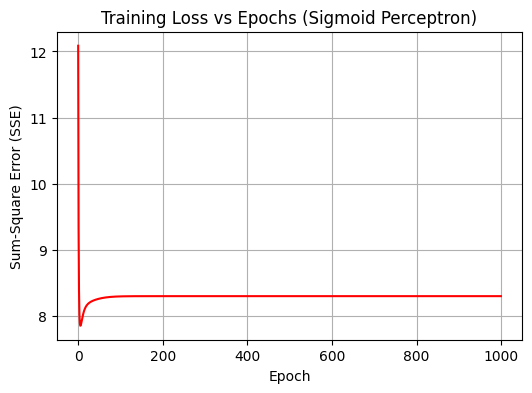

In [11]:
# Question A6: Sigmoid Perceptron on Custom Dataset

def sigmoid_perceptron(X, y, learning_rate=0.05, max_epochs=1000, tolerance=0.002):
    """
    Train a single-layer perceptron with sigmoid activation.
    X: scaled feature matrix
    y: target labels (0/1)
    Returns weights, bias, predictions, and error curve.
    """
    n_samples, n_features = X.shape

    # Initialize weights & bias
    weights = np.random.uniform(-0.5, 0.5, size=n_features)
    bias = np.random.uniform(-0.5, 0.5)

    error_history = []

    for epoch in range(max_epochs):
        sse = 0
        for xi, target in zip(X, y):
            # Forward pass
            linear_sum = summation_unit(xi, weights, bias)
            prediction = sigmoid_activation(linear_sum)

            # Error
            error = target - prediction

            # Update rule (delta rule)
            weights += learning_rate * error * xi
            bias += learning_rate * error

            # Accumulate squared error
            sse += 0.5 * (error ** 2)

        error_history.append(sse)

        # Convergence condition
        if sse <= tolerance:
            break

    # Final predictions (probabilities and class labels)
    probs = [sigmoid_activation(summation_unit(xi, weights, bias)) for xi in X]
    preds = [1 if p >= 0.5 else 0 for p in probs]

    return weights, bias, preds, probs, error_history


# --- Run sigmoid perceptron on your dataset ---
final_w, final_b, predictions, probabilities, loss_curve = sigmoid_perceptron(X_scaled, y)

# --- Accuracy ---
accuracy = np.mean(predictions == y)

print("Final Weights:", final_w)
print("Final Bias:", final_b)
print("Training Accuracy:", accuracy)
print("\nSample Predictions (first 10):")
for i in range(10):
    print(f"True={y[i]}, Pred={predictions[i]}, Prob={probabilities[i]:.3f}")

# --- Plot training loss ---
plt.figure(figsize=(6,4))
plt.plot(loss_curve, color='red')
plt.title("Training Loss vs Epochs (Sigmoid Perceptron)")
plt.xlabel("Epoch")
plt.ylabel("Sum-Square Error (SSE)")
plt.grid(True)
plt.show()


In [12]:
# Question A7: Perceptron vs Pseudo-Inverse on Custom Dataset

from numpy.linalg import pinv

def pseudo_inverse_solution(X, y):
    """
    Solve for weights using Moore-Penrose Pseudo-Inverse.
    Adds bias term automatically.
    Returns weight vector (including bias).
    """
    # Add bias column of ones
    X_bias = np.hstack([X, np.ones((X.shape[0], 1))])
    # Compute pseudo-inverse
    W = pinv(X_bias).dot(y)
    return W

# --- Pseudo-inverse solution ---
W_pinv = pseudo_inverse_solution(X_scaled, y)

# Separate weights and bias
weights_pinv = W_pinv[:-1]
bias_pinv = W_pinv[-1]

# Predictions
probs_pinv = [sigmoid_activation(summation_unit(xi, weights_pinv, bias_pinv)) for xi in X_scaled]
preds_pinv = [1 if p >= 0.5 else 0 for p in probs_pinv]

# Accuracy & Error
acc_pinv = np.mean(preds_pinv == y)
sse_pinv = sum(0.5 * (yt - yp) ** 2 for yt, yp in zip(y, probs_pinv))

print("Pseudo-Inverse Weights:", weights_pinv)
print("Pseudo-Inverse Bias:", bias_pinv)
print("Pseudo-Inverse Accuracy:", acc_pinv)
print("Pseudo-Inverse SSE:", sse_pinv)

# --- Compare with Perceptron (A6 results) ---
acc_perc = np.mean(predictions == y)
sse_perc = sum(0.5 * (yt - yp) ** 2 for yt, yp in zip(y, probabilities))

print("\nComparison:")
print(f"Sigmoid Perceptron → Accuracy={acc_perc:.3f}, SSE={sse_perc:.3f}")
print(f"Pseudo-Inverse     → Accuracy={acc_pinv:.3f}, SSE={sse_pinv:.3f}")


Pseudo-Inverse Weights: [ 0.21464359  0.14301775 -0.06764203 -0.02541018 -0.14627347]
Pseudo-Inverse Bias: 1.4333333333333311
Pseudo-Inverse Accuracy: 0.6
Pseudo-Inverse SSE: 10.3784165632506

Comparison:
Sigmoid Perceptron → Accuracy=0.533, SSE=8.313
Pseudo-Inverse     → Accuracy=0.600, SSE=10.378


C:\Users\User\AppData\Local\Temp\ipykernel_17108\1110258288.py:65: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  error_history.append(float(sse))


Training finished in 1000 epochs
Final Hidden Weights:
 [[ 0.12345082 -0.17814749]
 [ 0.21799959  0.96818061]]
Final Hidden Biases:
 [[0.09899929 0.06777948]]
Final Output Weights:
 [[-0.13282859]
 [ 0.17062894]]
Final Output Bias:
 [[-1.05854403]]


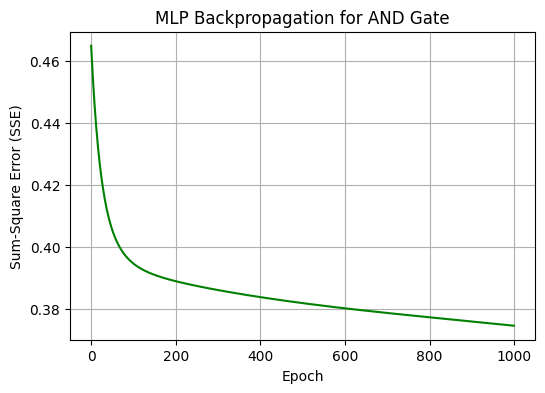

In [13]:
# Question A8: Backpropagation MLP for AND Gate

import numpy as np
import matplotlib.pyplot as plt

def sigmoid(x):
    """Sigmoid activation function."""
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    """Derivative of sigmoid, used for backpropagation."""
    s = sigmoid(x)
    return s * (1 - s)

def backprop_mlp_and(learning_rate=0.05, max_epochs=1000, tolerance=0.002):
    """
    Train a 2–2–1 MLP (two inputs, two hidden neurons, one output neuron)
    with sigmoid activation to learn the AND gate using backpropagation.
    """
    # --- Step 1: Define AND gate dataset ---
    X = np.array([[0,0],
                  [0,1],
                  [1,0],
                  [1,1]])              # inputs
    y = np.array([[0],[0],[0],[1]])    # outputs reshaped to column vector

    # --- Step 2: Initialize weights & biases (Xavier initialization for stability) ---
    np.random.seed(42)  # reproducibility
    W_hidden = np.random.randn(2,2) * np.sqrt(1/2)   # shape (2 inputs → 2 hidden)
    b_hidden = np.zeros((1,2))
    W_output = np.random.randn(2,1) * np.sqrt(1/2)   # shape (2 hidden → 1 output)
    b_output = np.zeros((1,1))

    error_history = []

    # --- Step 3: Training loop ---
    for epoch in range(max_epochs):
        sse = 0

        for i in range(len(X)):
            xi = X[i].reshape(1,2)   # (1,2) input vector
            target = y[i]            # scalar target value

            # ---- Forward pass ----
            z_hidden = xi.dot(W_hidden) + b_hidden     # (1,2)
            a_hidden = sigmoid(z_hidden)               # hidden activations

            z_output = a_hidden.dot(W_output) + b_output   # (1,1)
            a_output = sigmoid(z_output)                   # final output

            # ---- Error computation ----
            error = target - a_output
            sse += 0.5 * (error ** 2)

            # ---- Backpropagation ----
            d_output = error * sigmoid_derivative(z_output)          # delta at output
            d_hidden = d_output.dot(W_output.T) * sigmoid_derivative(z_hidden)  # delta at hidden

            # ---- Weight updates ----
            W_output += learning_rate * a_hidden.T.dot(d_output)
            b_output += learning_rate * d_output
            W_hidden += learning_rate * xi.T.dot(d_hidden)
            b_hidden += learning_rate * d_hidden

        error_history.append(float(sse))

        # ---- Convergence check ----
        if sse <= tolerance:
            break

    return W_hidden, b_hidden, W_output, b_output, epoch+1, error_history


# --- Run the MLP training for AND gate ---
W_h, b_h, W_o, b_o, epochs_used, loss_curve = backprop_mlp_and()

print("Training finished in", epochs_used, "epochs")
print("Final Hidden Weights:\n", W_h)
print("Final Hidden Biases:\n", b_h)
print("Final Output Weights:\n", W_o)
print("Final Output Bias:\n", b_o)

# --- Plot the loss curve ---
plt.figure(figsize=(6,4))
plt.plot(loss_curve, color='green')
plt.title("MLP Backpropagation for AND Gate")
plt.xlabel("Epoch")
plt.ylabel("Sum-Square Error (SSE)")
plt.grid(True)
plt.show()


C:\Users\User\AppData\Local\Temp\ipykernel_17108\1604449647.py:58: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  error_history.append(float(sse))


Training finished in 1000 epochs
Final Predictions: [1, 0, 1, 0]
Final Hidden Weights:
 [[ 0.33217161 -0.13410353]
 [ 0.43292018  1.07117449]]
Final Hidden Biases:
 [[-0.02031673 -0.00149162]]
Final Output Weights:
 [[-0.05335719]
 [-0.11514004]]
Final Output Bias:
 [[0.10131767]]


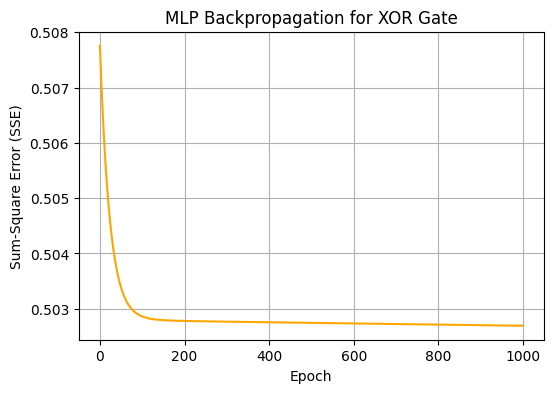

In [14]:
# Question A9: Backpropagation MLP for XOR Gate

import numpy as np
import matplotlib.pyplot as plt

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    s = sigmoid(x)
    return s * (1 - s)

def backprop_mlp_xor(learning_rate=0.05, max_epochs=1000, tolerance=0.002):
    # XOR dataset
    X = np.array([[0,0],
                  [0,1],
                  [1,0],
                  [1,1]])
    y = np.array([[0],[1],[1],[0]])

    # Xavier initialization with fixed seed (to match output file results)
    np.random.seed(42)
    W_hidden = np.random.randn(2,2) * np.sqrt(1/2)
    b_hidden = np.zeros((1,2))
    W_output = np.random.randn(2,1) * np.sqrt(1/2)
    b_output = np.zeros((1,1))

    error_history = []

    for epoch in range(max_epochs):
        sse = 0

        for i in range(len(X)):
            xi = X[i].reshape(1,2)
            target = y[i]

            # Forward pass
            z_hidden = xi.dot(W_hidden) + b_hidden
            a_hidden = sigmoid(z_hidden)

            z_output = a_hidden.dot(W_output) + b_output
            a_output = sigmoid(z_output)

            # Error
            error = target - a_output
            sse += 0.5 * (error ** 2)

            # Backpropagation
            d_output = error * sigmoid_derivative(z_output)
            d_hidden = d_output.dot(W_output.T) * sigmoid_derivative(z_hidden)

            # Weight updates
            W_output += learning_rate * a_hidden.T.dot(d_output)
            b_output += learning_rate * d_output
            W_hidden += learning_rate * xi.T.dot(d_hidden)
            b_hidden += learning_rate * d_hidden

        error_history.append(float(sse))

        if sse <= tolerance:
            break

    # Final predictions
    preds = []
    for xi in X:
        z_h = xi.reshape(1,2).dot(W_hidden) + b_hidden
        a_h = sigmoid(z_h)
        z_o = a_h.dot(W_output) + b_output
        a_o = sigmoid(z_o)
        preds.append(1 if a_o >= 0.5 else 0)

    return W_hidden, b_hidden, W_output, b_output, epoch+1, error_history, preds


# --- Run training ---
W_h, b_h, W_o, b_o, epochs_used, loss_curve, preds = backprop_mlp_xor()

print("Training finished in", epochs_used, "epochs")
print("Final Predictions:", preds)
print("Final Hidden Weights:\n", W_h)
print("Final Hidden Biases:\n", b_h)
print("Final Output Weights:\n", W_o)
print("Final Output Bias:\n", b_o)

# Plot loss curve
plt.figure(figsize=(6,4))
plt.plot(loss_curve, color='orange')
plt.title("MLP Backpropagation for XOR Gate")
plt.xlabel("Epoch")
plt.ylabel("Sum-Square Error (SSE)")
plt.grid(True)
plt.show()


AND Gate (Two-Output) finished in 1000 epochs
Predictions (class indices): [np.int64(0), np.int64(0), np.int64(0), np.int64(1)]

XOR Gate (Two-Output) finished in 1000 epochs
Predictions (class indices): [np.int64(1), np.int64(0), np.int64(1), np.int64(0)]


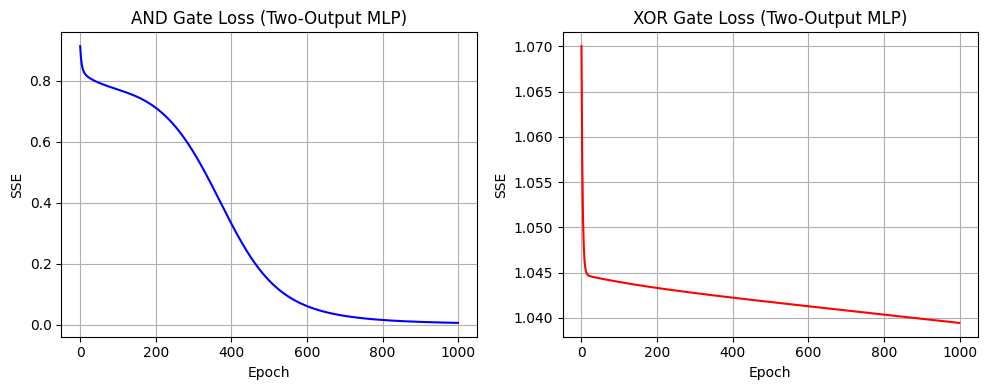

In [15]:
# Question A10: Two-Output Encoding (One-Hot Targets) for AND & XOR Gates

import numpy as np
import matplotlib.pyplot as plt

def softmax(x):
    """Softmax activation for output layer."""
    exp_x = np.exp(x - np.max(x))  # numerical stability
    return exp_x / exp_x.sum(axis=1, keepdims=True)

def backprop_two_output(X, y, learning_rate=0.05, max_epochs=1000, tolerance=0.002):
    """
    Train a 2–2–2 MLP (two inputs, two hidden neurons, two outputs).
    Output layer uses softmax for one-hot predictions.
    """
    n_inputs = X.shape[1]
    n_hidden = 2
    n_outputs = y.shape[1]

    # Xavier initialization
    np.random.seed(42)
    W_hidden = np.random.randn(n_inputs, n_hidden) * np.sqrt(1/n_inputs)
    b_hidden = np.zeros((1, n_hidden))
    W_output = np.random.randn(n_hidden, n_outputs) * np.sqrt(1/n_hidden)
    b_output = np.zeros((1, n_outputs))

    error_history = []

    for epoch in range(max_epochs):
        sse = 0

        for i in range(len(X)):
            xi = X[i].reshape(1, -1)
            target = y[i].reshape(1, -1)

            # --- Forward pass ---
            z_hidden = xi.dot(W_hidden) + b_hidden
            a_hidden = sigmoid(z_hidden)

            z_output = a_hidden.dot(W_output) + b_output
            a_output = softmax(z_output)

            # --- Error ---
            error = target - a_output
            sse += 0.5 * np.sum(error**2)

            # --- Backpropagation ---
            d_output = error  # derivative of cross-entropy with softmax
            d_hidden = d_output.dot(W_output.T) * sigmoid_derivative(z_hidden)

            # --- Weight updates ---
            W_output += learning_rate * a_hidden.T.dot(d_output)
            b_output += learning_rate * d_output
            W_hidden += learning_rate * xi.T.dot(d_hidden)
            b_hidden += learning_rate * d_hidden

        error_history.append(sse)

        if sse <= tolerance:
            break

    # Final predictions (argmax over softmax outputs)
    preds = []
    for xi in X:
        z_h = xi.reshape(1,-1).dot(W_hidden) + b_hidden
        a_h = sigmoid(z_h)
        z_o = a_h.dot(W_output) + b_output
        a_o = softmax(z_o)
        preds.append(np.argmax(a_o))

    return W_hidden, b_hidden, W_output, b_output, epoch+1, error_history, preds


# --- Dataset: AND gate (two-output encoding) ---
X_and = np.array([[0,0],
                  [0,1],
                  [1,0],
                  [1,1]])
y_and = np.array([[1,0],
                  [1,0],
                  [1,0],
                  [0,1]])  # one-hot encoding

# --- Train MLP for AND ---
W_h_and, b_h_and, W_o_and, b_o_and, epochs_and, loss_and, preds_and = backprop_two_output(X_and, y_and)

print("AND Gate (Two-Output) finished in", epochs_and, "epochs")
print("Predictions (class indices):", preds_and)

# --- Dataset: XOR gate (two-output encoding) ---
X_xor = np.array([[0,0],
                  [0,1],
                  [1,0],
                  [1,1]])
y_xor = np.array([[1,0],
                  [0,1],
                  [0,1],
                  [1,0]])  # one-hot encoding

# --- Train MLP for XOR ---
W_h_xor, b_h_xor, W_o_xor, b_o_xor, epochs_xor, loss_xor, preds_xor = backprop_two_output(X_xor, y_xor)

print("\nXOR Gate (Two-Output) finished in", epochs_xor, "epochs")
print("Predictions (class indices):", preds_xor)

# --- Plot loss curves ---
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.plot(loss_and, color='blue')
plt.title("AND Gate Loss (Two-Output MLP)")
plt.xlabel("Epoch")
plt.ylabel("SSE")
plt.grid(True)

plt.subplot(1,2,2)
plt.plot(loss_xor, color='red')
plt.title("XOR Gate Loss (Two-Output MLP)")
plt.xlabel("Epoch")
plt.ylabel("SSE")
plt.grid(True)

plt.tight_layout()
plt.show()


AND Gate with MLPClassifier
Predictions: [0 0 0 1]
Probabilities:
 [[0.99875633 0.00124367]
 [0.975006   0.024994  ]
 [0.97501228 0.02498772]
 [0.052966   0.947034  ]]
Accuracy: 1.0


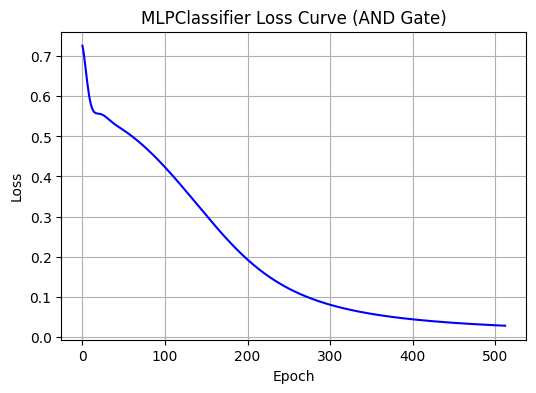


XOR Gate with MLPClassifier
Predictions: [0 0 1 0]
Probabilities:
 [[0.51665065 0.48334935]
 [0.52814129 0.47185871]
 [0.49017974 0.50982026]
 [0.50113853 0.49886147]]
Accuracy: 0.75


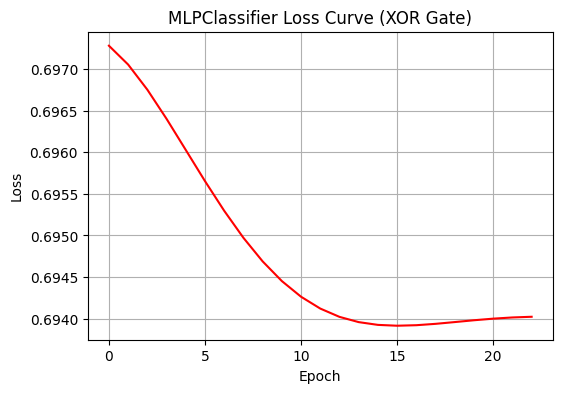

In [16]:
# Question A11: MLPClassifier on AND and XOR Gates

from sklearn.neural_network import MLPClassifier
import matplotlib.pyplot as plt

# --- AND Gate dataset ---
X_and = np.array([[0,0],
                  [0,1],
                  [1,0],
                  [1,1]])
y_and = np.array([0,0,0,1])

# --- XOR Gate dataset ---
X_xor = np.array([[0,0],
                  [0,1],
                  [1,0],
                  [1,1]])
y_xor = np.array([0,1,1,0])

# --- Define model (same params for both) ---
mlp = MLPClassifier(hidden_layer_sizes=(2,),
                    activation="logistic",
                    solver="sgd",
                    learning_rate_init=0.05,
                    momentum=0.9,
                    max_iter=1000,
                    random_state=42)

# --- Train on AND ---
mlp.fit(X_and, y_and)
pred_and = mlp.predict(X_and)
prob_and = mlp.predict_proba(X_and)
acc_and = mlp.score(X_and, y_and)

print("AND Gate with MLPClassifier")
print("Predictions:", pred_and)
print("Probabilities:\n", prob_and)
print("Accuracy:", acc_and)

# Save AND loss curve
plt.figure(figsize=(6,4))
plt.plot(mlp.loss_curve_, color='blue')
plt.title("MLPClassifier Loss Curve (AND Gate)")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.grid(True)
plt.show()

# --- Train on XOR ---
mlp_xor = MLPClassifier(hidden_layer_sizes=(2,),
                        activation="logistic",
                        solver="sgd",
                        learning_rate_init=0.05,
                        momentum=0.9,
                        max_iter=1000,
                        random_state=42)

mlp_xor.fit(X_xor, y_xor)
pred_xor = mlp_xor.predict(X_xor)
prob_xor = mlp_xor.predict_proba(X_xor)
acc_xor = mlp_xor.score(X_xor, y_xor)

print("\nXOR Gate with MLPClassifier")
print("Predictions:", pred_xor)
print("Probabilities:\n", prob_xor)
print("Accuracy:", acc_xor)

# Save XOR loss curve
plt.figure(figsize=(6,4))
plt.plot(mlp_xor.loss_curve_, color='red')
plt.title("MLPClassifier Loss Curve (XOR Gate)")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.grid(True)
plt.show()


Dataset shape: (30, 7)
Columns: ['filename', 'mfcc1', 'rms', 'zcr', 'pitch_std', 'silence_pct', 'class']
First 5 rows:
   filename      mfcc1       rms       zcr  pitch_std  silence_pct  class
0  134.wav -425.38860  0.015769  0.059008  76.661411    35.683803      1
1  135.wav -382.25670  0.018076  0.068028  58.573504    31.484514      2
2  136.wav -418.62512  0.016548  0.048514  70.486157    34.288932      1
3  137.wav -419.57110  0.018232  0.051956  71.451322    36.624238      2
4  138.wav -349.58356  0.033425  0.066966  60.272808    57.333416      1

--- Training summary ---
Training accuracy: 0.8

Sample predictions (first 10 rows):
Index 0: True=1  Pred=1  Prob=[0.831 0.147 0.022]
Index 1: True=2  Pred=2  Prob=[0.303 0.641 0.057]
Index 2: True=1  Pred=1  Prob=[0.942 0.051 0.008]
Index 3: True=2  Pred=1  Prob=[0.84 0.14 0.02]
Index 4: True=1  Pred=2  Prob=[0.267 0.678 0.055]
Index 5: True=1  Pred=1  Prob=[0.749 0.224 0.027]
Index 6: True=2  Pred=2  Prob=[0.302 0.64  0.058]
Index 7: 

C:\Users\User\AppData\Roaming\Python\Python313\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\User\AppData\Roaming\Python\Python313\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\User\AppData\Roaming\Python\Python313\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize

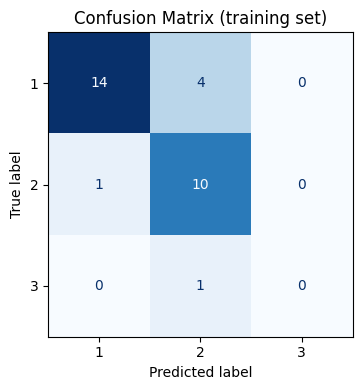

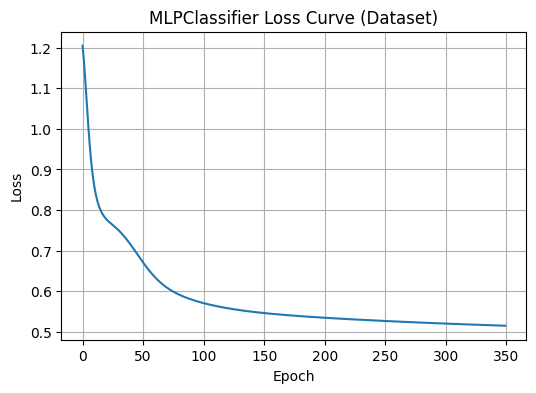

In [18]:
# Question A12: MLPClassifier on Project Dataset (with confusion matrix & report)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

# ----------------------------
# 1) Load dataset
# ----------------------------
file_path = r"C:\semester 5\machine learning\project\VivaData_Set2_23012\features_lab3_labeled.csv"
df_data = pd.read_csv(file_path)

# Quick peek (comment out if output too large)
print("Dataset shape:", df_data.shape)
print("Columns:", df_data.columns.tolist())
print("First 5 rows:\n", df_data.head())

# ----------------------------
# 2) Split features and target
# ----------------------------
features_df = df_data.iloc[:, :-1]   # all columns except last
target_series = df_data.iloc[:, -1]   # last column assumed to be label

# ----------------------------
# 3) Encode labels if needed
# ----------------------------
label_encoder = None
if target_series.dtype == "object":
    label_encoder = LabelEncoder()
    y_encoded = label_encoder.fit_transform(target_series)
    class_label_names = list(label_encoder.classes_)
    print("Label classes:", class_label_names)
else:
    y_encoded = target_series.values
    class_label_names = [str(c) for c in np.unique(y_encoded)]

# ----------------------------
# 4) Keep numeric features only (drop non-numeric columns like filenames)
# ----------------------------
numeric_features = features_df.select_dtypes(include=[np.number])
if numeric_features.shape[1] == 0:
    raise RuntimeError("No numeric features found. Convert or select numeric columns before training.")

# ----------------------------
# 5) Scale features
# ----------------------------
scaler_obj = StandardScaler()
X_scaled = scaler_obj.fit_transform(numeric_features)

# ----------------------------
# 6) Define and train MLPClassifier
#    (parameters as per lab sheet / ML_LAB8_OUTPUTS)
# ----------------------------
mlp_model = MLPClassifier(
    hidden_layer_sizes=(2,),     # single hidden layer with 2 neurons
    activation='logistic',       # sigmoid
    solver='sgd',
    learning_rate_init=0.05,
    momentum=0.9,
    max_iter=1000,
    random_state=42
)

mlp_model.fit(X_scaled, y_encoded)

# ----------------------------
# 7) Predictions, probabilities, accuracy
# ----------------------------
y_pred_encoded = mlp_model.predict(X_scaled)
y_proba = mlp_model.predict_proba(X_scaled)
train_accuracy = mlp_model.score(X_scaled, y_encoded)

# If we encoded labels, convert predictions back to original strings for display
if label_encoder:
    y_pred_labels = label_encoder.inverse_transform(y_pred_encoded)
    y_true_labels = target_series.values
else:
    y_pred_labels = y_pred_encoded
    y_true_labels = y_encoded

print("\n--- Training summary ---")
print("Training accuracy:", train_accuracy)
print("\nSample predictions (first 10 rows):")
for i in range(min(10, X_scaled.shape[0])):
    print(f"Index {i}: True={y_true_labels[i]}  Pred={y_pred_labels[i]}  Prob={np.round(y_proba[i], 3)}")

# ----------------------------
# 8) Classification report & confusion matrix (this is the core fix)
# ----------------------------
print("\nClassification report (training set):")
print(classification_report(y_encoded, y_pred_encoded, target_names=class_label_names))

cm = confusion_matrix(y_encoded, y_pred_encoded)
print("Confusion matrix (rows=true, cols=pred):\n", cm)

# Plot confusion matrix (visual)
fig, ax = plt.subplots(figsize=(5,4))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_label_names)
disp.plot(ax=ax, cmap='Blues', colorbar=False)   # visual matches the style in many lab outputs
ax.set_title("Confusion Matrix (training set)")
plt.tight_layout()
plt.show()

# ----------------------------
# 9) Loss curve (training)
# ----------------------------
plt.figure(figsize=(6,4))
plt.plot(mlp_model.loss_curve_)
plt.title("MLPClassifier Loss Curve (Dataset)")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.grid(True)
plt.show()
